In [1]:
import csv
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import random
import numpy as np

In [2]:
def read_points(dataset_name, label_col_number):
    points = []
    labels = []
    with open (dataset_name, 'r') as fin:
        csvReader = csv.reader(fin, delimiter=',')
        for row in csvReader:
            if csvReader.line_num != 1:
                float_row = []
                for i in range(0, len(row)):
                    if i != label_col_number:
                        float_row.append(float(row[i]))
                points.append(float_row)
                if (int(row[label_col_number])) == 1:
                    labels.append(1)
                else:
                    labels.append(-1)
    return points, labels

In [3]:
def split(points, labels):
    test_indexes = random.sample(range(len(points)), len(points) // 5)
    train_indexes = set([i for i in range(len(points))]) - set(test_indexes)
    return [points[i] for i in train_indexes], [labels[i] for i in train_indexes], [points[i] for i in test_indexes], [labels[i] for i in test_indexes]

In [4]:
def pocket_perceptron(points, labels, N):
    train_points, train_labels, test_points, test_labels = split(points, labels)
    w = []
    for i in range(len(train_points[0])):
        w.append(np.random.uniform())
    iteration = 0
    min_bad_points = len(train_points)
    pocket = w
    test_line = []
    min_bad_points_test = len(test_points)
 
    for _ in tqdm_notebook(range(N)):   
        for i in range(len(train_points)):
            if np.sign(np.inner(w, train_points[i])) != train_labels[i]:
                a = [j * train_labels[i] for j in train_points[i]]
                for j in range(len(w)):
                    w[j] += a[j]
                break
        bad_points = 0
        for i in range(len(test_points)):
            if np.sign(np.inner(w, test_points[i])) != test_labels[i]:
                bad_points += 1
        if bad_points < min_bad_points_test:
            min_bad_points_test = bad_points
        test_line.append(1.0 * min_bad_points_test / len(test_points))
        
        bad_points = 0
        for i in range(len(train_points)):
            if np.sign(np.inner(w, train_points[i])) != train_labels[i]:
                bad_points += 1
        if bad_points < min_bad_points:
            min_bad_points = bad_points
            pocket = w
        if min_bad_points == 0:
            break
    return w, test_line       


0.025


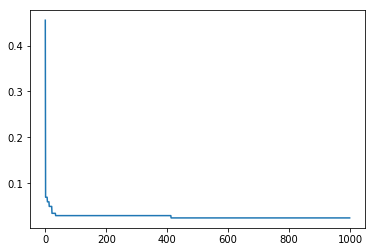

In [5]:
points, labels = read_points("../Datasets/blobs2.csv", 2)
for point in points:
    point.append(1)
N = 1000
w, y = pocket_perceptron(points, labels, N)
print(y[-1])
x = list(range(N))
plt.plot(x, y)
plt.show()

In [6]:
def draw_point(x, y, color, size=10):
    plt.scatter(x, y, size, color)

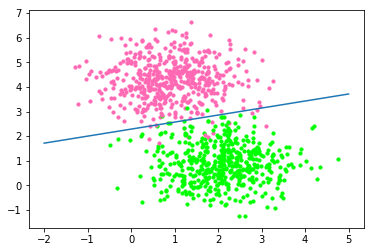

In [7]:
k = - w[0] * 1.0 / w[1]
b = - w[2] * 1.0 / w[1]
x = np.linspace(-2,5,100)
y = k * x + b
plt.plot(x, y)
for i in tqdm_notebook(range(len(points))):
    color = 'hotpink'
    if labels[i] == 1:
        color = 'lime'
    draw_point(points[i][0], points[i][1], color)
plt.show()